In [1]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
Years = ['18','19','20','21']

In [3]:
CY = '17'

In [4]:
Data = pd.read_csv('DATA{0}.csv'.format(CY))
#Data.head()

In [5]:
Data = Data.loc[Data['YEAR BUILT']>0] #Blueberry


In [6]:
Data

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS PRE,BLOCK,LOT,EASE-MENT,BUILDING CLASS,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,28,,C4,738 EAST 6TH STREET,...,11,0,11,1750,6500,1900,2,C4,3750000,2017-04-03 00:00:00
1,1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,36,,C7,27 AVENUE C,...,24,1,25,2650,9960,1910,2,C7,5235000,2017-07-11 00:00:00
2,2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,5,,C2,151 AVENUE B,...,5,0,5,2139,4416,1900,2,C2,0,2017-06-16 00:00:00
3,3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
4,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,400,61,,C7,193 EAST 4TH STREET,...,11,1,12,2388,8045,1900,2,C7,7675000,2017-11-13 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88654,9591,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,136,,B2,86 ROBIN COURT,...,2,0,2,2450,2500,1995,1,B2,627500,2017-12-18 00:00:00
88655,9592,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,50,,B9,23 QUAIL LANE,...,2,0,2,4765,2575,1998,1,B9,690000,2017-09-14 00:00:00
88656,9593,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
88657,9594,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00


In [7]:
Data2 = Data[['ZIP CODE','GROSS SQUARE FEET','SALE PRICE', 'BUILDING CLASS', 'BUILDING CLASS CATEGORY', 'BOROUGH']]
Data2

,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH
0,10009,6500,3750000,C4,07 RENTALS - WALKUP APARTMENTS,1
1,10009,9960,5235000,C7,07 RENTALS - WALKUP APARTMENTS,1
2,10009,4416,0,C2,07 RENTALS - WALKUP APARTMENTS,1
3,10009,6440,6625000,C2,07 RENTALS - WALKUP APARTMENTS,1
4,10009,8045,7675000,C7,07 RENTALS - WALKUP APARTMENTS,1
...,...,...,...,...,...,...
88654,10309,2500,627500,B2,02 TWO FAMILY DWELLINGS,5
88655,10309,2575,690000,B9,02 TWO FAMILY DWELLINGS,5
88656,10309,2377,550000,B9,02 TWO FAMILY DWELLINGS,5
88657,10309,1496,460000,B2,02 TWO FAMILY DWELLINGS,5


Dataframe with only residential buildings between building class A-D  
https://www.nyc.gov/assets/finance/jump/hlpbldgcode.html

In [8]:
#accessing building class category using Building class id
#filtering out residential buildings 
cat = ['A', 'B', 'C', 'D']
Data2['BUILDING CLASS ID'] = Data2['BUILDING CLASS'].apply(lambda x: x[:1]). astype(str)
#Data2#apply a custom inline function taking first digit of the category




In [9]:
#new dataframe with only residential buildings in 2017

Data3 = Data2.loc[(Data2['BUILDING CLASS ID'].isin(cat))]
Data3
Data3['BUILDING CLASS ID'].unique()

array(['C', 'D', 'A', 'B'], dtype=object)

Sanity checks for new 2017 Dataframe 

In [10]:
Data3 = Data3.loc[(Data3['ZIP CODE']>=10000)&(Data3['ZIP CODE']<11500)]

In [11]:
Data3 = Data3.loc[Data3['SALE PRICE']>0]

In [12]:
Data3 = Data3.loc[Data3['GROSS SQUARE FEET']>0]
Data3.to_csv('2017_residentialbuildingswithid')

In [13]:
#2017 residential buildings with groupby 
Data4 = Data3[['ZIP CODE','BOROUGH', 'GROSS SQUARE FEET', 'SALE PRICE']]
Data4 = Data4.groupby(by=['ZIP CODE','BOROUGH']).sum()
#Data4

In [14]:
Data4['PPSQ{0}'.format(CY)]=Data4['SALE PRICE']/Data4['GROSS SQUARE FEET']
#Data4.head()

In [15]:
FinData_2017 = Data4
FinData_2017.head()

,,GROSS SQUARE FEET,SALE PRICE,PPSQ17
ZIP CODE,BOROUGH,,,
10001,1,28108,44336548,1577.364024
10002,1,592577,417873625,705.180297
10003,1,414097,134447506,324.676358
10007,1,21840,15000000,686.813187
10009,1,115428,111261204,963.901341


In [16]:
#2018 data
Data_2018 = pd.read_csv('DATA18.csv')
Data_2018 = Data_2018.loc[(Data_2018['YEAR BUILT']>0) & (Data_2018['ZIP CODE']>=10000) & (Data_2018['ZIP CODE']<11500)] 
Data_2018_1 = Data_2018[['ZIP CODE','GROSS SQUARE FEET','SALE PRICE', 'BUILDING CLASS', 'BUILDING CLASS CATEGORY', 'BOROUGH']]
Data_2018_1
    
    

    

,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH
0,10009.0,2183.0,0,A4,01 ONE FAMILY DWELLINGS,1
1,10009.0,2183.0,4844809,A4,01 ONE FAMILY DWELLINGS,1
2,10009.0,5200.0,6100000,A4,01 ONE FAMILY DWELLINGS,1
3,10009.0,4764.0,0,B1,02 TWO FAMILY DWELLINGS,1
4,10009.0,4520.0,0,B9,02 TWO FAMILY DWELLINGS,1
...,...,...,...,...,...,...
83776,10309.0,1850.0,680000,B9,02 TWO FAMILY DWELLINGS,5
83777,10309.0,0.0,793216,V0,05 TAX CLASS 1 VACANT LAND,5
83778,10309.0,2612.0,671026,A5,05 TAX CLASS 1 VACANT LAND,5
83779,10309.0,2612.0,610950,A5,05 TAX CLASS 1 VACANT LAND,5


In [17]:
Data_2018_1['BUILDING CLASS'] = Data_2018_1['BUILDING CLASS'].astype(str)
Data_2018_1['BUILDING CLASS ID'] = Data_2018_1['BUILDING CLASS'].apply(lambda x:x[:1])
Data_2018_2 = Data_2018_1.loc[(Data_2018_1['BUILDING CLASS ID'].isin(cat))]
Data_2018_2.shape

#Data_2018_2 is the dataframe with builing id - shape 56811

(56811, 7)

In [18]:
Data_2018_3 = Data_2018_2.loc[Data_2018_2['SALE PRICE']>0]
Data_2018_3 = Data_2018_3.loc[Data_2018_3['GROSS SQUARE FEET']>0]






In [19]:
Data_2018_4 = Data_2018_3[['ZIP CODE','BOROUGH', 'GROSS SQUARE FEET', 'SALE PRICE']]
Data_2018_4 = Data_2018_4.groupby(by=['ZIP CODE','BOROUGH']).sum()
Data_2018_4['PPSQ18'] = Data_2018_4['SALE PRICE']/Data_2018_4['GROSS SQUARE FEET']
Data_2018_4



,,GROSS SQUARE FEET,SALE PRICE,PPSQ18
ZIP CODE,BOROUGH,,,
10001.0,1,6735.0,9900000,1469.933185
10002.0,1,169499.0,154045000,908.825421
10003.0,1,325988.0,259412047,795.771768
10009.0,1,471662.0,264883115,561.595200
10010.0,1,22246.0,31200000,1402.499326
...,...,...,...,...
11432.0,4,488100.0,192835226,395.073194
11433.0,4,507884.0,162366947,319.692975
11434.0,4,901588.0,290896868,322.649445


In [20]:
Data_2019 = pd.read_csv('DATA19.csv')
Data_2019 = Data_2019.loc[(Data_2019['YEAR BUILT']>0) & (Data_2019['ZIP CODE']>=10000) & (Data_2019['ZIP CODE']<11500)] 
Data_2019_1 = Data_2019[['ZIP CODE','GROSS SQUARE FEET','SALE PRICE', 'BUILDING CLASS', 'BUILDING CLASS CATEGORY','BOROUGH']]
Data_2019_1
    

,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH
0,10009.0,3680.0,3200000,S1,01 ONE FAMILY DWELLINGS,1
1,10009.0,2183.0,0,A4,01 ONE FAMILY DWELLINGS,1
2,10009.0,4520.0,0,B9,02 TWO FAMILY DWELLINGS,1
3,10009.0,3600.0,6300000,C0,03 THREE FAMILY DWELLINGS,1
4,10009.0,5110.0,0,C0,03 THREE FAMILY DWELLINGS,1
...,...,...,...,...,...,...
83914,10309.0,1710.0,0,B9,02 TWO FAMILY DWELLINGS,5
83915,10309.0,1710.0,637500,B9,02 TWO FAMILY DWELLINGS,5
83916,10309.0,0.0,599701,B9,05 TAX CLASS 1 VACANT LAND,5
83917,10309.0,0.0,896060,B9,05 TAX CLASS 1 VACANT LAND,5


In [21]:
Data_2019_1['BUILDING CLASS'] = Data_2019_1['BUILDING CLASS'].astype(str)
Data_2019_1['BUILDING CLASS ID'] = Data_2019_1['BUILDING CLASS'].apply(lambda x:x[:1])
Data_2019_2 = Data_2019_1.loc[(Data_2019_1['BUILDING CLASS ID'].isin(cat))]
Data_2019_2

,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH,BUILDING CLASS ID
1,10009.0,2183.0,0,A4,01 ONE FAMILY DWELLINGS,1,A
2,10009.0,4520.0,0,B9,02 TWO FAMILY DWELLINGS,1,B
3,10009.0,3600.0,6300000,C0,03 THREE FAMILY DWELLINGS,1,C
4,10009.0,5110.0,0,C0,03 THREE FAMILY DWELLINGS,1,C
5,10009.0,7989.0,1950000,C1,07 RENTALS - WALKUP APARTMENTS,1,C
...,...,...,...,...,...,...,...
83913,10309.0,2565.0,625000,B9,02 TWO FAMILY DWELLINGS,5,B
83914,10309.0,1710.0,0,B9,02 TWO FAMILY DWELLINGS,5,B
83915,10309.0,1710.0,637500,B9,02 TWO FAMILY DWELLINGS,5,B
83916,10309.0,0.0,599701,B9,05 TAX CLASS 1 VACANT LAND,5,B


In [22]:
Data_2019_3 = Data_2019_2.loc[Data_2019_2['SALE PRICE']>0]
Data_2019_3 = Data_2019_3.loc[Data_2019_3['GROSS SQUARE FEET']>0]

In [23]:
Data_2019_4 = Data_2019_3[['ZIP CODE','BOROUGH', 'GROSS SQUARE FEET', 'SALE PRICE']]
Data_2019_4 = Data_2019_4.groupby(by=['ZIP CODE','BOROUGH']).sum()
Data_2019_4['PPSQ19'] = Data_2019_4['SALE PRICE']/Data_2019_4['GROSS SQUARE FEET']
Data_2019_4.head()


,,GROSS SQUARE FEET,SALE PRICE,PPSQ19
ZIP CODE,BOROUGH,,,
10001.0,1,298696.0,246400000,824.918981
10002.0,1,224263.0,133872340,596.943499
10003.0,1,483259.0,287712700,595.359217
10009.0,1,315238.0,100264389,318.059336
10010.0,1,3080.0,3700000,1201.298701


In [24]:
Data_2020 = pd.read_csv('DATA20.csv')
Data_2020 = Data_2020.loc[(Data_2020['YEAR BUILT']>0) & (Data_2020['ZIP CODE']>=10000) & (Data_2020['ZIP CODE']<11500)] 
Data_2020_1 = Data_2020[['ZIP CODE','GROSS SQUARE FEET','SALE PRICE', 'BUILDING CLASS', 'BUILDING CLASS CATEGORY','BOROUGH']]
Data_2020_1

,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH
0,10009.0,5154.0,0,B9,02 TWO FAMILY DWELLINGS,1
1,10009.0,3084.0,0,C0,03 THREE FAMILY DWELLINGS,1
2,10009.0,3084.0,4350000,C0,03 THREE FAMILY DWELLINGS,1
3,10009.0,6445.0,0,C7,07 RENTALS - WALKUP APARTMENTS,1
4,10009.0,6929.0,3672530,C7,07 RENTALS - WALKUP APARTMENTS,1
...,...,...,...,...,...,...
68677,10309.0,2400.0,775000,B2,02 TWO FAMILY DWELLINGS,5
68678,10309.0,2250.0,500000,B9,02 TWO FAMILY DWELLINGS,5
68679,10309.0,1980.0,537000,B9,02 TWO FAMILY DWELLINGS,5
68680,10309.0,1980.0,525000,B9,02 TWO FAMILY DWELLINGS,5


In [25]:
Data_2020_1['BUILDING CLASS'] = Data_2020_1['BUILDING CLASS'].astype(str)
Data_2020_1['BUILDING CLASS ID'] = Data_2020_1['BUILDING CLASS'].apply(lambda x:x[:1])
Data_2020_2 = Data_2020_1.loc[(Data_2020_1['BUILDING CLASS ID'].isin(cat))]
Data_2020_2

,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH,BUILDING CLASS ID
0,10009.0,5154.0,0,B9,02 TWO FAMILY DWELLINGS,1,B
1,10009.0,3084.0,0,C0,03 THREE FAMILY DWELLINGS,1,C
2,10009.0,3084.0,4350000,C0,03 THREE FAMILY DWELLINGS,1,C
3,10009.0,6445.0,0,C7,07 RENTALS - WALKUP APARTMENTS,1,C
4,10009.0,6929.0,3672530,C7,07 RENTALS - WALKUP APARTMENTS,1,C
...,...,...,...,...,...,...,...
68677,10309.0,2400.0,775000,B2,02 TWO FAMILY DWELLINGS,5,B
68678,10309.0,2250.0,500000,B9,02 TWO FAMILY DWELLINGS,5,B
68679,10309.0,1980.0,537000,B9,02 TWO FAMILY DWELLINGS,5,B
68680,10309.0,1980.0,525000,B9,02 TWO FAMILY DWELLINGS,5,B


In [26]:
Data_2020_3 = Data_2020_2.loc[Data_2020_2['SALE PRICE']>0]
Data_2020_3 = Data_2020_3.loc[Data_2020_3['GROSS SQUARE FEET']>0]
Data_2020_3


,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH,BUILDING CLASS ID
2,10009.0,3084.0,4350000,C0,03 THREE FAMILY DWELLINGS,1,C
4,10009.0,6929.0,3672530,C7,07 RENTALS - WALKUP APARTMENTS,1,C
5,10009.0,13206.0,1,C4,07 RENTALS - WALKUP APARTMENTS,1,C
6,10009.0,13248.0,2500,C4,07 RENTALS - WALKUP APARTMENTS,1,C
7,10009.0,13248.0,290000,C4,07 RENTALS - WALKUP APARTMENTS,1,C
...,...,...,...,...,...,...,...
68675,10309.0,1850.0,665000,B9,02 TWO FAMILY DWELLINGS,5,B
68677,10309.0,2400.0,775000,B2,02 TWO FAMILY DWELLINGS,5,B
68678,10309.0,2250.0,500000,B9,02 TWO FAMILY DWELLINGS,5,B
68679,10309.0,1980.0,537000,B9,02 TWO FAMILY DWELLINGS,5,B


In [27]:
Data_2020_4 = Data_2020_3[['ZIP CODE','BOROUGH', 'GROSS SQUARE FEET', 'SALE PRICE']]
Data_2020_4 = Data_2020_4.groupby(by=['ZIP CODE','BOROUGH']).sum()
Data_2020_4['PPSQ20'] = Data_2020_4['SALE PRICE']/Data_2020_4['GROSS SQUARE FEET']
Data_2020_4

,,GROSS SQUARE FEET,SALE PRICE,PPSQ20
ZIP CODE,BOROUGH,,,
10002.0,1,703462.0,452662600,643.478397
10003.0,1,103177.0,104977156,1017.447261
10009.0,1,9389957.0,89390690,9.519819
10010.0,1,7440.0,12175000,1636.424731
10011.0,1,120962.0,173172068,1431.623717
...,...,...,...,...
11432.0,4,362054.0,144417504,398.883879
11433.0,4,327696.0,105863468,323.053891
11434.0,4,601425.0,213710631,355.340451


In [28]:
Data_2020 = pd.read_csv('DATA20.csv')
Data_2020 = Data_2020.loc[(Data_2020['YEAR BUILT']>0) & (Data_2020['ZIP CODE']>=10000) & (Data_2020['ZIP CODE']<11500)] 
Data_2020_1 = Data_2020[['ZIP CODE','GROSS SQUARE FEET','SALE PRICE', 'BUILDING CLASS', 'BUILDING CLASS CATEGORY','BOROUGH']]
Data_2020_1

,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH
0,10009.0,5154.0,0,B9,02 TWO FAMILY DWELLINGS,1
1,10009.0,3084.0,0,C0,03 THREE FAMILY DWELLINGS,1
2,10009.0,3084.0,4350000,C0,03 THREE FAMILY DWELLINGS,1
3,10009.0,6445.0,0,C7,07 RENTALS - WALKUP APARTMENTS,1
4,10009.0,6929.0,3672530,C7,07 RENTALS - WALKUP APARTMENTS,1
...,...,...,...,...,...,...
68677,10309.0,2400.0,775000,B2,02 TWO FAMILY DWELLINGS,5
68678,10309.0,2250.0,500000,B9,02 TWO FAMILY DWELLINGS,5
68679,10309.0,1980.0,537000,B9,02 TWO FAMILY DWELLINGS,5
68680,10309.0,1980.0,525000,B9,02 TWO FAMILY DWELLINGS,5


In [29]:
Data_2020_1['BUILDING CLASS'] = Data_2020_1['BUILDING CLASS'].astype(str)
Data_2020_1['BUILDING CLASS ID'] = Data_2020_1['BUILDING CLASS'].apply(lambda x:x[:1])
Data_2020_2 = Data_2020_1.loc[(Data_2020_1['BUILDING CLASS ID'].isin(cat))]
Data_2020_2

,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH,BUILDING CLASS ID
0,10009.0,5154.0,0,B9,02 TWO FAMILY DWELLINGS,1,B
1,10009.0,3084.0,0,C0,03 THREE FAMILY DWELLINGS,1,C
2,10009.0,3084.0,4350000,C0,03 THREE FAMILY DWELLINGS,1,C
3,10009.0,6445.0,0,C7,07 RENTALS - WALKUP APARTMENTS,1,C
4,10009.0,6929.0,3672530,C7,07 RENTALS - WALKUP APARTMENTS,1,C
...,...,...,...,...,...,...,...
68677,10309.0,2400.0,775000,B2,02 TWO FAMILY DWELLINGS,5,B
68678,10309.0,2250.0,500000,B9,02 TWO FAMILY DWELLINGS,5,B
68679,10309.0,1980.0,537000,B9,02 TWO FAMILY DWELLINGS,5,B
68680,10309.0,1980.0,525000,B9,02 TWO FAMILY DWELLINGS,5,B


In [30]:
Data_2021 = pd.read_csv('DATA21.csv')
Data_2021 = Data_2021.loc[(Data_2021['YEAR BUILT']>0) & (Data_2021['ZIP CODE']>=10000) & (Data_2021['ZIP CODE']<11500)] 
Data_2021_1 = Data_2021[['ZIP CODE','GROSS SQUARE FEET','SALE PRICE', 'BUILDING CLASS', 'BUILDING CLASS CATEGORY','BOROUGH']]
Data_2021_1

,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH
0,10009.0,4400.0,2385000,A4,01 ONE FAMILY DWELLINGS,1
1,10009.0,2160.0,3025000,B1,02 TWO FAMILY DWELLINGS,1
2,10009.0,9750.0,154196,C4,07 RENTALS - WALKUP APARTMENTS,1
3,10009.0,11017.0,0,C4,07 RENTALS - WALKUP APARTMENTS,1
4,10009.0,17754.0,7500000,C1,07 RENTALS - WALKUP APARTMENTS,1
...,...,...,...,...,...,...
99082,10309.0,2178.0,219973,B9,02 TWO FAMILY DWELLINGS,5
99083,10309.0,2400.0,0,B2,02 TWO FAMILY DWELLINGS,5
99084,10309.0,2250.0,550000,B9,02 TWO FAMILY DWELLINGS,5
99085,10309.0,2565.0,638500,B9,02 TWO FAMILY DWELLINGS,5


In [31]:
Data_2021_1['BUILDING CLASS'] = Data_2021_1['BUILDING CLASS'].astype(str)
Data_2021_1['BUILDING CLASS ID'] = Data_2021_1['BUILDING CLASS'].apply(lambda x:x[:1])
Data_2021_2 = Data_2021_1.loc[(Data_2021_1['BUILDING CLASS ID'].isin(cat))]
Data_2021_2

,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH,BUILDING CLASS ID
0,10009.0,4400.0,2385000,A4,01 ONE FAMILY DWELLINGS,1,A
1,10009.0,2160.0,3025000,B1,02 TWO FAMILY DWELLINGS,1,B
2,10009.0,9750.0,154196,C4,07 RENTALS - WALKUP APARTMENTS,1,C
3,10009.0,11017.0,0,C4,07 RENTALS - WALKUP APARTMENTS,1,C
4,10009.0,17754.0,7500000,C1,07 RENTALS - WALKUP APARTMENTS,1,C
...,...,...,...,...,...,...,...
99082,10309.0,2178.0,219973,B9,02 TWO FAMILY DWELLINGS,5,B
99083,10309.0,2400.0,0,B2,02 TWO FAMILY DWELLINGS,5,B
99084,10309.0,2250.0,550000,B9,02 TWO FAMILY DWELLINGS,5,B
99085,10309.0,2565.0,638500,B9,02 TWO FAMILY DWELLINGS,5,B


In [32]:
Data_2021_3 = Data_2021_2.loc[Data_2021_2['SALE PRICE']>0]
Data_2021_3 = Data_2021_3.loc[Data_2021_3['GROSS SQUARE FEET']>0]
Data_2021_3

,ZIP CODE,GROSS SQUARE FEET,SALE PRICE,BUILDING CLASS,BUILDING CLASS CATEGORY,BOROUGH,BUILDING CLASS ID
0,10009.0,4400.0,2385000,A4,01 ONE FAMILY DWELLINGS,1,A
1,10009.0,2160.0,3025000,B1,02 TWO FAMILY DWELLINGS,1,B
2,10009.0,9750.0,154196,C4,07 RENTALS - WALKUP APARTMENTS,1,C
4,10009.0,17754.0,7500000,C1,07 RENTALS - WALKUP APARTMENTS,1,C
5,10009.0,5320.0,3425000,C7,07 RENTALS - WALKUP APARTMENTS,1,C
...,...,...,...,...,...,...,...
99081,10309.0,2007.0,675000,B9,02 TWO FAMILY DWELLINGS,5,B
99082,10309.0,2178.0,219973,B9,02 TWO FAMILY DWELLINGS,5,B
99084,10309.0,2250.0,550000,B9,02 TWO FAMILY DWELLINGS,5,B
99085,10309.0,2565.0,638500,B9,02 TWO FAMILY DWELLINGS,5,B


In [33]:
Data_2021_4 = Data_2021_3[['ZIP CODE','BOROUGH', 'GROSS SQUARE FEET', 'SALE PRICE']]
Data_2021_4 = Data_2021_4.groupby(by=['ZIP CODE','BOROUGH']).sum()
Data_2021_4['PPSQ21'] = Data_2021_4['SALE PRICE']/Data_2021_4['GROSS SQUARE FEET']
Data_2021_4

,,GROSS SQUARE FEET,SALE PRICE,PPSQ21
ZIP CODE,BOROUGH,,,
10001.0,1,87821.0,17532581,199.639961
10002.0,1,142549.0,86510000,606.879038
10003.0,1,498519.0,561175328,1125.684935
10009.0,1,225035.0,162820734,723.535157
10010.0,1,10200.0,12600000,1235.294118
...,...,...,...,...
11432.0,4,421294.0,196982678,467.565828
11433.0,4,358231.0,134897165,376.564745
11434.0,4,672111.0,266433830,396.413435


In [34]:
FinData1 = pd.merge(Data4,Data_2018_4,left_on = ['ZIP CODE','BOROUGH'],right_on=['ZIP CODE','BOROUGH'],how = 'outer')
FinData2 = pd.merge(FinData1,Data_2019_4, left_on =  ['ZIP CODE','BOROUGH'],right_on=['ZIP CODE','BOROUGH'],how = 'outer')
FinData3 = pd.merge(FinData2,Data_2020_4, left_on =  ['ZIP CODE','BOROUGH'],right_on=['ZIP CODE','BOROUGH'],how = 'outer')
FinData4 = pd.merge(FinData3,Data_2021_4, left_on = ['ZIP CODE','BOROUGH'],right_on=['ZIP CODE','BOROUGH'],how = 'outer')
FinData4

,,GROSS SQUARE FEET_x,SALE PRICE_x,PPSQ17,GROSS SQUARE FEET_y,SALE PRICE_y,PPSQ18,GROSS SQUARE FEET_x,SALE PRICE_x,PPSQ19,GROSS SQUARE FEET_y,SALE PRICE_y,PPSQ20,GROSS SQUARE FEET,SALE PRICE,PPSQ21
ZIP CODE,BOROUGH,,,,,,,,,,,,,,,
10001.0,1,28108.0,44336548.0,1577.364024,6735.0,9900000.0,1469.933185,298696.0,246400000.0,824.918981,NaN,NaN,NaN,87821.0,17532581.0,199.639961
10002.0,1,592577.0,417873625.0,705.180297,169499.0,154045000.0,908.825421,224263.0,133872340.0,596.943499,703462.0,452662600.0,643.478397,142549.0,86510000.0,606.879038
10003.0,1,414097.0,134447506.0,324.676358,325988.0,259412047.0,795.771768,483259.0,287712700.0,595.359217,103177.0,104977156.0,1017.447261,498519.0,561175328.0,1125.684935
10007.0,1,21840.0,15000000.0,686.813187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10009.0,1,115428.0,111261204.0,963.901341,471662.0,264883115.0,561.595200,315238.0,100264389.0,318.059336,9389957.0,89390690.0,9.519819,225035.0,162820734.0,723.535157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11434.0,4,821776.0,236710548.0,288.047531,901588.0,290896868.0,322.649445,838571.0,280256426.0,334.207152,601425.0,213710631.0,355.340451,672111.0,266433830.0,396.413435
11435.0,4,353835.0,114109207.0,322.492707,431314.0,144821419.0,335.767953,363019.0,123842526.0,341.146127,732718.0,90119732.0,122.993747,780927.0,325698209.0,417.066139
11436.0,4,334953.0,101652485.0,303.482832,374106.0,129331770.0,345.708890,330073.0,115752492.0,350.687551,257265.0,101181074.0,393.295139,239053.0,105985882.0,443.357256


In [35]:
FinData_f = FinData4[["PPSQ17","PPSQ18","PPSQ19","PPSQ20","PPSQ21"]]
FinData_f["Avg_171819"] = (FinData_f["PPSQ17"] + FinData_f["PPSQ18"] +FinData_f["PPSQ19"])/3
FinData_f["Change_17-18"]= FinData_f["PPSQ17"]- FinData_f["PPSQ18"]
FinData_f["Change_18-19"]= FinData_f["PPSQ18"]- FinData_f["PPSQ19"]
FinData_f["Change_19-20"]= FinData_f["PPSQ19"]- FinData_f["PPSQ20"]
FinData_f["Change_20-21"]= FinData_f["PPSQ20"]- FinData_f["PPSQ21"]
FinData_f= FinData_f.reset_index()

In [36]:
FinData_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ZIP CODE      171 non-null    float64
 1   BOROUGH       171 non-null    int64  
 2   PPSQ17        169 non-null    float64
 3   PPSQ18        169 non-null    float64
 4   PPSQ19        167 non-null    float64
 5   PPSQ20        165 non-null    float64
 6   PPSQ21        168 non-null    float64
 7   Avg_171819    166 non-null    float64
 8   Change_17-18  167 non-null    float64
 9   Change_18-19  167 non-null    float64
 10  Change_19-20  165 non-null    float64
 11  Change_20-21  165 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 16.2 KB


<AxesSubplot:>

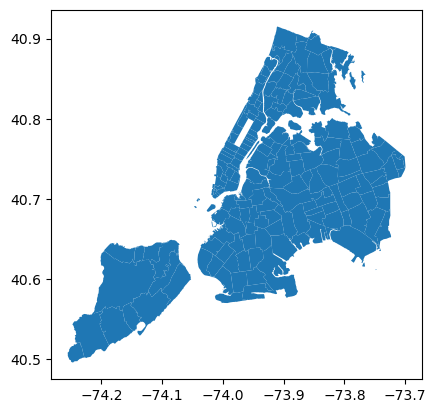

In [37]:
import geopandas as gpd
NYCzip=gpd.read_file("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/NY.geojson")
NYCzip = NYCzip.loc[(NYCzip['zipcode']>=10000)&(NYCzip['zipcode']<11500)]
NYCzip.plot()

In [38]:
Result = NYCzip.merge(FinData_f,left_on='zipcode',right_on='ZIP CODE')

In [39]:
Result.head()

,zipcode,geometry,ZIP CODE,BOROUGH,PPSQ17,PPSQ18,PPSQ19,PPSQ20,PPSQ21,Avg_171819,Change_17-18,Change_18-19,Change_19-20,Change_20-21
0,11372.0,"POLYGON Z ((-73.86942 40.74916 0.00000, -73.89...",11372.0,4,121.464173,429.242159,446.848643,385.122832,376.642737,332.518325,-307.777986,-17.606485,61.725811,8.480096
1,11004.0,"POLYGON Z ((-73.71068 40.75004 0.00000, -73.70...",11004.0,4,467.593598,506.534936,518.058025,519.204547,529.695389,497.395520,-38.941338,-11.523090,-1.146521,-10.490842
2,11040.0,"POLYGON Z ((-73.70098 40.73890 0.00000, -73.70...",11040.0,4,470.209240,518.006233,545.990943,524.646634,567.703006,511.402139,-47.796993,-27.984710,21.344309,-43.056372
3,11426.0,"POLYGON Z ((-73.72270 40.75373 0.00000, -73.72...",11426.0,4,401.464132,438.188459,451.622624,483.102311,496.339385,430.425072,-36.724327,-13.434165,-31.479688,-13.237073
4,11365.0,"POLYGON Z ((-73.81089 40.72717 0.00000, -73.81...",11365.0,4,506.689815,554.357075,555.768331,537.636477,578.172563,538.938407,-47.667260,-1.411256,18.131855,-40.536086


In [40]:
Result.columns

Index(['zipcode', 'geometry', 'ZIP CODE', 'BOROUGH', 'PPSQ17', 'PPSQ18',
       'PPSQ19', 'PPSQ20', 'PPSQ21', 'Avg_171819', 'Change_17-18',
       'Change_18-19', 'Change_19-20', 'Change_20-21'],
      dtype='object')

<AxesSubplot:>

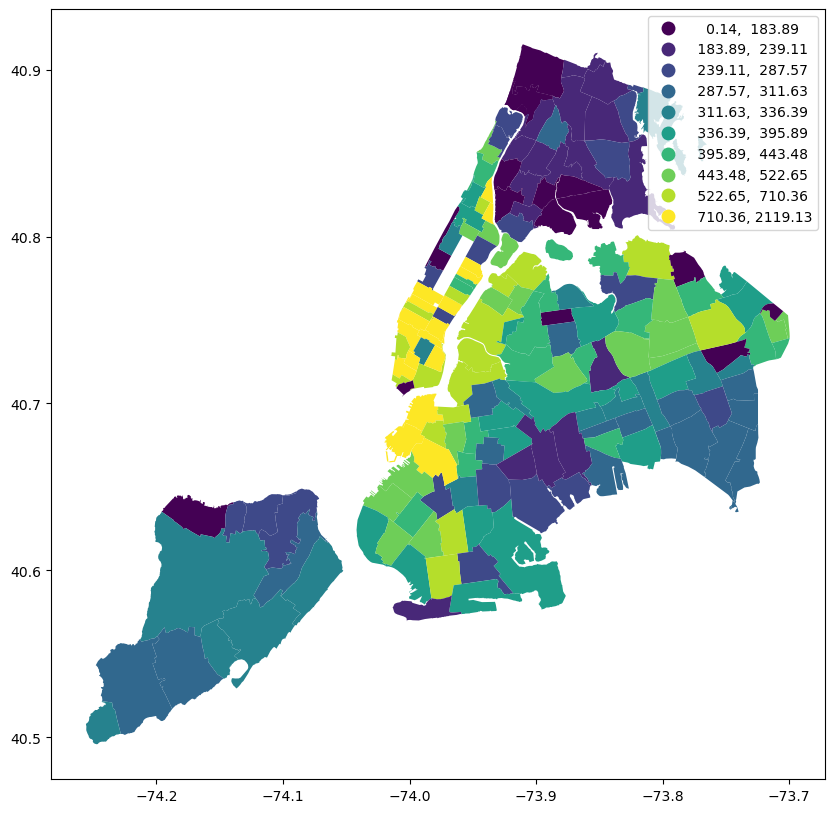

In [41]:
Result.plot(figsize = (10,10), column='PPSQ17' ,k=10,scheme = 'Quantiles', legend=True)

<AxesSubplot:>

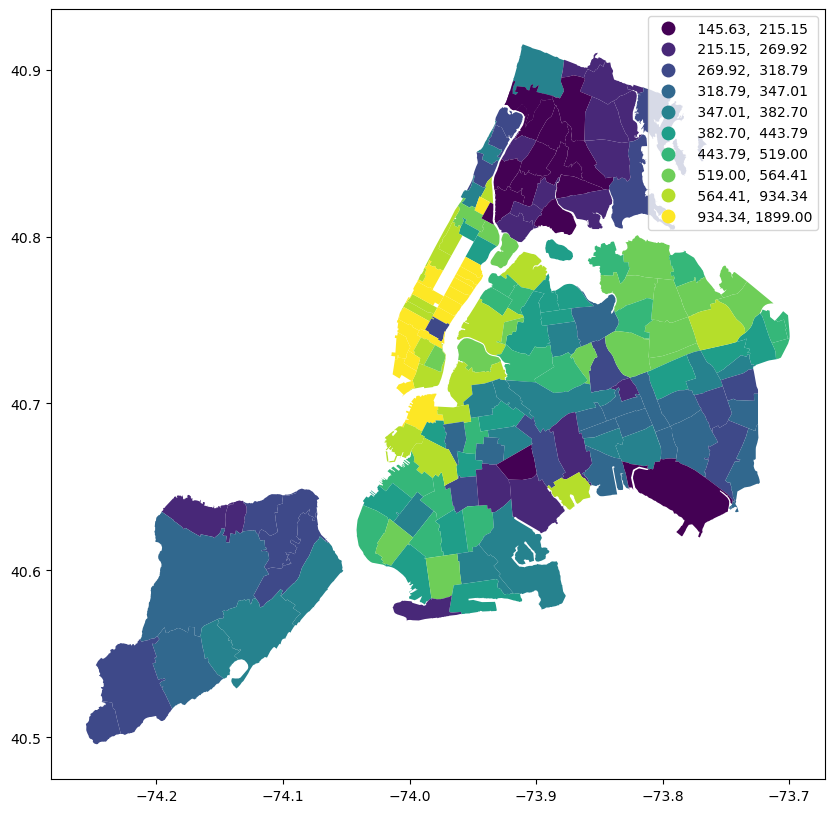

In [42]:
Result.plot(figsize = (10,10), column='PPSQ18' ,k=10,scheme = 'Quantiles', legend=True)

<AxesSubplot:>

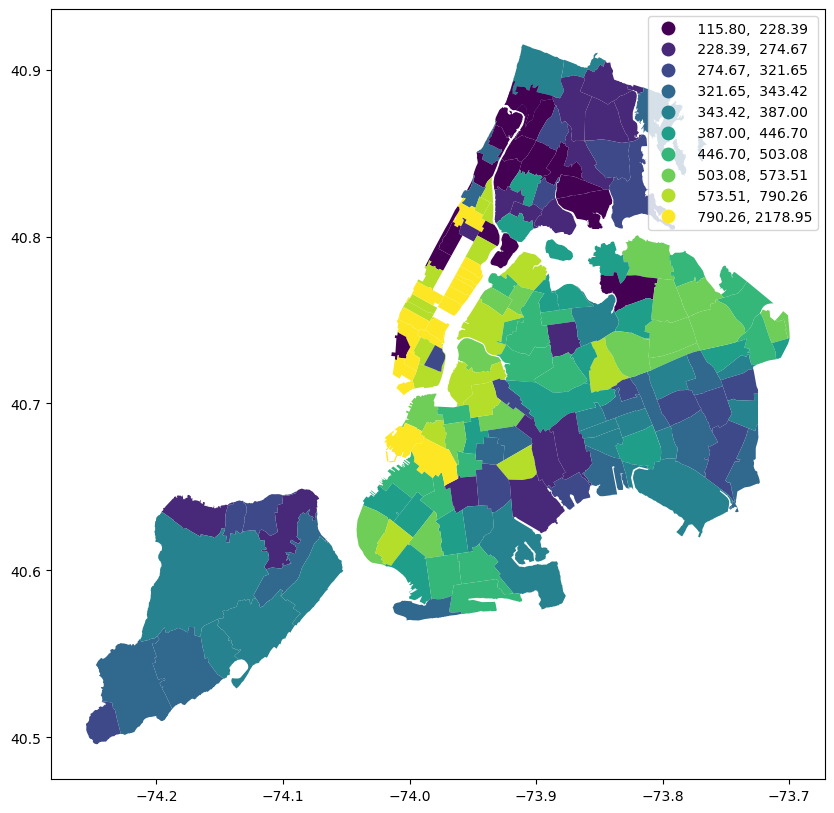

In [43]:
Result.plot(figsize = (10,10), column='PPSQ19' ,k=10,scheme = 'Quantiles', legend=True)

<AxesSubplot:>

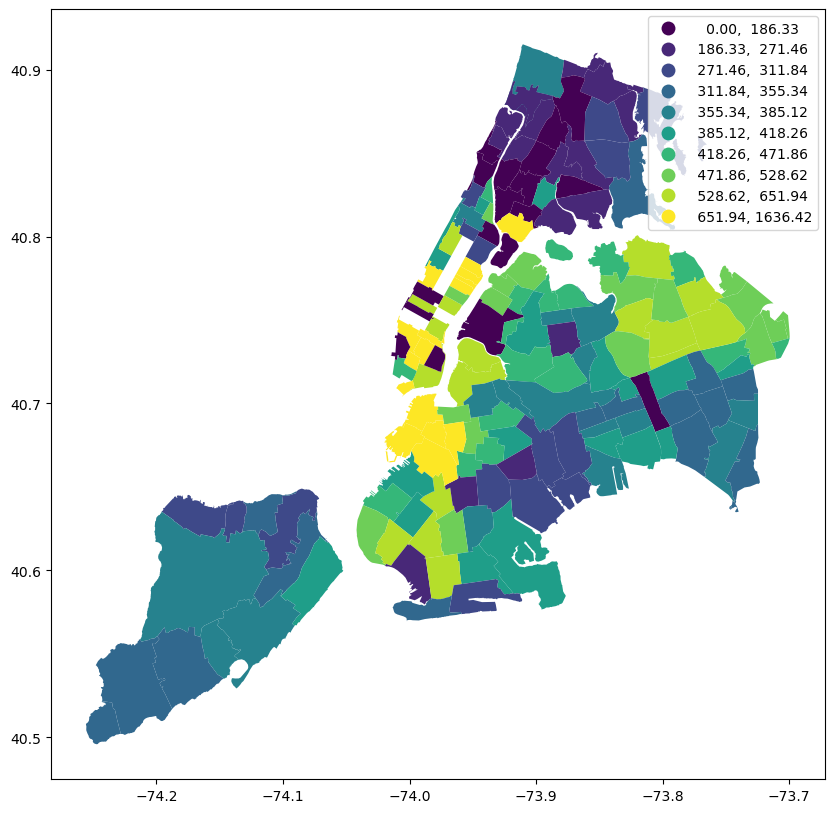

In [44]:
Result.plot(figsize = (10,10), column='PPSQ20' ,k=10,scheme = 'Quantiles', legend=True)

<AxesSubplot:>

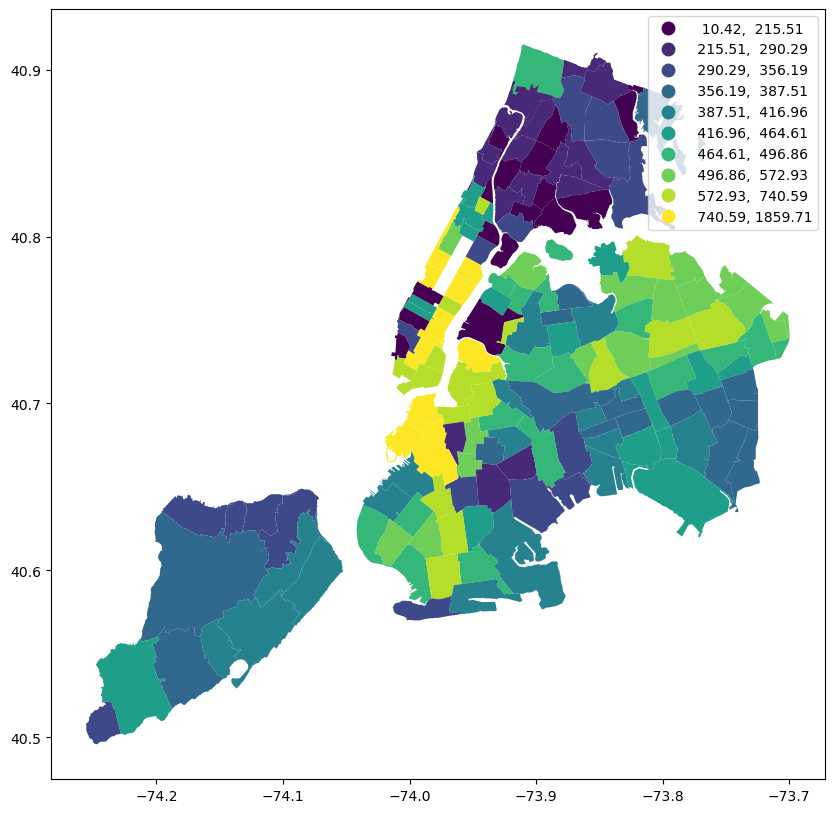

In [45]:
Result.plot(figsize = (10,10), column='PPSQ21' ,k=10,scheme = 'Quantiles', legend=True)

<AxesSubplot:>

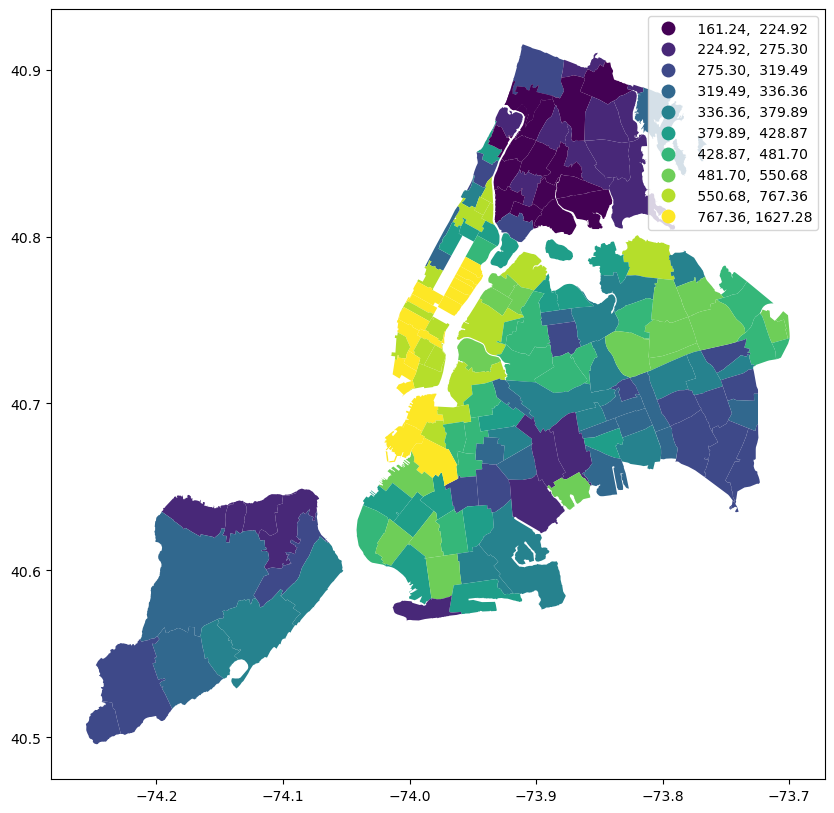

In [46]:
##'Avg_171819', 'Change_17-18','Change_18-19', 'Change_19-20', 'Change_20-21']
Result.plot(figsize = (10,10), column='Avg_171819' ,k=10,scheme = 'Quantiles', legend=True)


<AxesSubplot:>

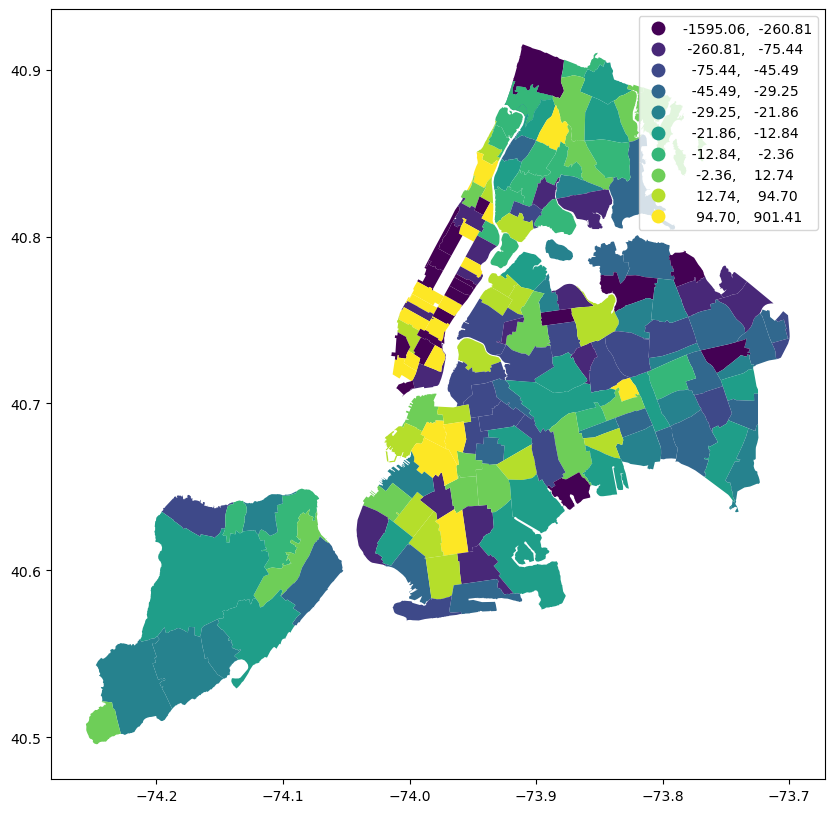

In [47]:
##'Avg_171819', 'Change_17-18','Change_18-19', 'Change_19-20', 'Change_20-21']
Result.plot(figsize = (10,10), column='Change_17-18' ,k=10,scheme = 'Quantiles', legend=True)


<AxesSubplot:>

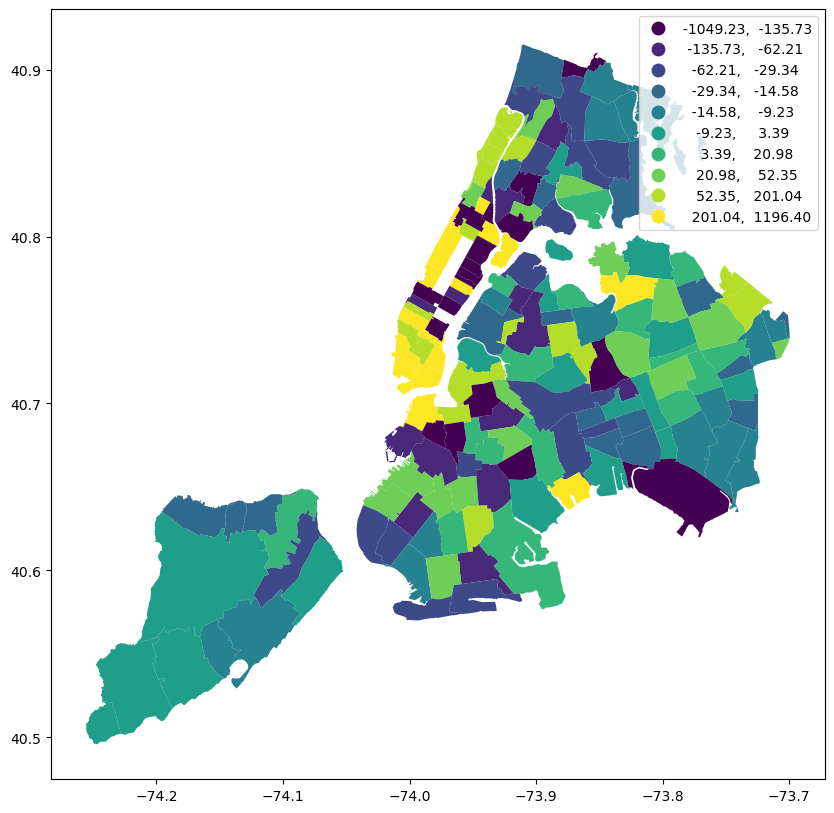

In [48]:
##'Avg_171819', 'Change_17-18','Change_18-19', 'Change_19-20', 'Change_20-21']
Result.plot(figsize = (10,10), column='Change_18-19' ,k=10,scheme = 'Quantiles', legend=True)


<AxesSubplot:>

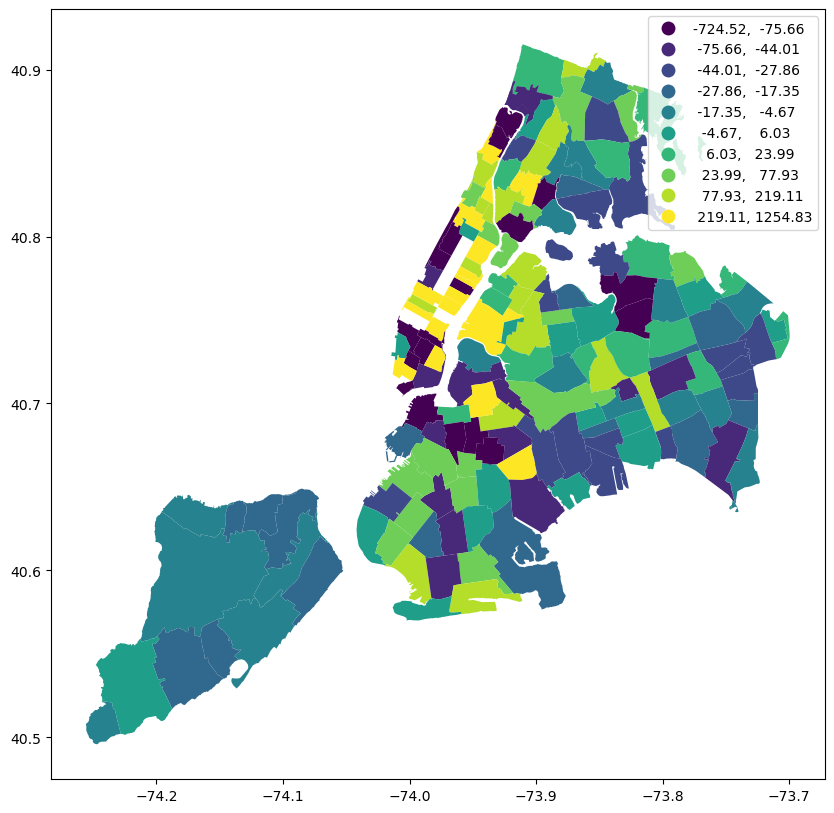

In [49]:
##'Avg_171819', 'Change_17-18','Change_18-19', 'Change_19-20', 'Change_20-21']
Result.plot(figsize = (10,10), column='Change_19-20' ,k=10,scheme = 'Quantiles', legend=True)


<AxesSubplot:>

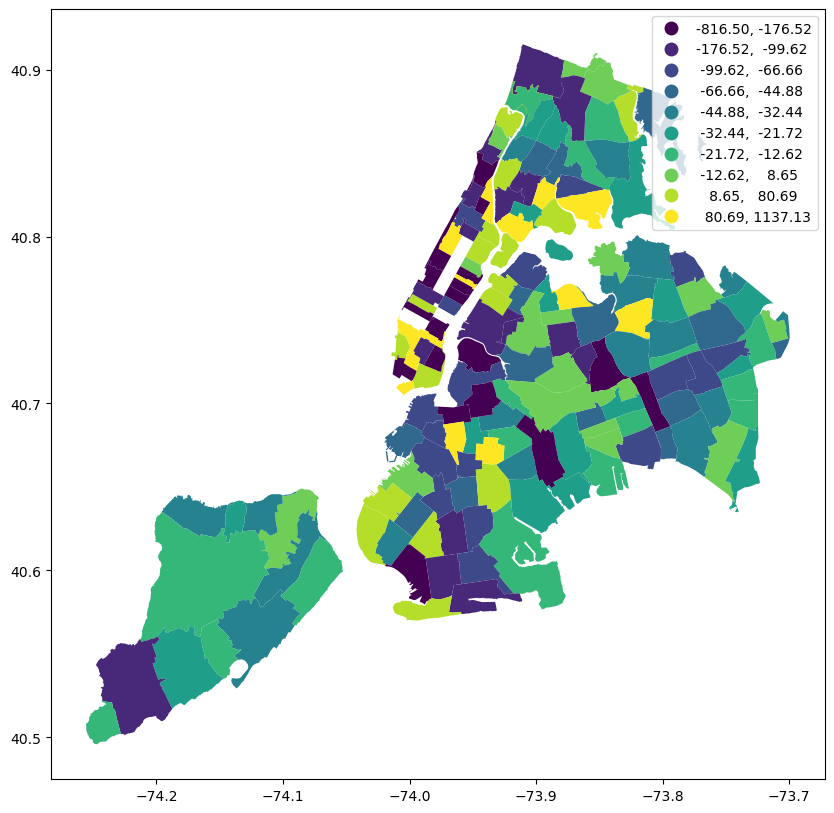

In [50]:
##'Avg_171819', 'Change_17-18','Change_18-19', 'Change_19-20', 'Change_20-21']
Result.plot(figsize = (10,10), column='Change_20-21' ,k=10,scheme = 'Quantiles', legend=True)


In [61]:
DataSC = pd.concat([Data3,Data_2018_3,Data_2019_3,Data_2020_3,Data_2021_3], axis=0, ignore_index=True)
DataSC.shape

(127435, 7)

In [96]:
DataSC_2017 = Data3.groupby(by=['ZIP CODE','BOROUGH']).agg({'SALE PRICE' : 'count'})
DataSC_2017.reset_index(inplace = True)
DataSC_2017['SALE COUNT 17'] = DataSC_2017['SALE PRICE']
DataSC_2017.drop(columns = 'SALE PRICE', axis = 1, inplace = True)
DataSC_2017

,ZIP CODE,BOROUGH,SALE COUNT 17
0,10001,1,3
1,10002,1,15
2,10003,1,16
3,10007,1,1
4,10009,1,10
...,...,...,...
164,11432,4,214
165,11433,4,341
166,11434,4,560
167,11435,4,208


In [97]:
DataSC_2018 = Data_2018_3.groupby(by=['ZIP CODE','BOROUGH']).agg({'SALE PRICE' : 'count'})
DataSC_2018.reset_index(inplace = True)
DataSC_2018['SALE COUNT 18'] = DataSC_2018['SALE PRICE']
DataSC_2018.drop(columns = 'SALE PRICE', axis = 1, inplace = True)
DataSC_2018

,ZIP CODE,BOROUGH,SALE COUNT 18
0,10001.0,1,2
1,10002.0,1,14
2,10003.0,1,23
3,10009.0,1,35
4,10010.0,1,2
...,...,...,...
164,11432.0,4,218
165,11433.0,4,340
166,11434.0,4,606
167,11435.0,4,251


In [98]:
DataSC_2019 = Data_2019_3.groupby(by=['ZIP CODE','BOROUGH']).agg({'SALE PRICE' : 'count'})
DataSC_2019.reset_index(inplace = True)
DataSC_2019['SALE COUNT 19'] = DataSC_2019['SALE PRICE']
DataSC_2019.drop(columns = 'SALE PRICE', axis = 1, inplace = True)
DataSC_2019

,ZIP CODE,BOROUGH,SALE COUNT 19
0,10001.0,1,3
1,10002.0,1,13
2,10003.0,1,28
3,10009.0,1,29
4,10010.0,1,1
...,...,...,...
162,11432.0,4,146
163,11433.0,4,325
164,11434.0,4,540
165,11435.0,4,213


In [99]:
DataSC_2020 = Data_2020_3.groupby(by=['ZIP CODE','BOROUGH']).agg({'SALE PRICE' : 'count'})
DataSC_2020.reset_index(inplace = True)
DataSC_2020['SALE COUNT 20'] = DataSC_2020['SALE PRICE']
DataSC_2020.drop(columns = 'SALE PRICE', axis = 1, inplace = True)
DataSC_2020

,ZIP CODE,BOROUGH,SALE COUNT 20
0,10002.0,1,5
1,10003.0,1,14
2,10009.0,1,35
3,10010.0,1,1
4,10011.0,1,19
...,...,...,...
160,11432.0,4,131
161,11433.0,4,211
162,11434.0,4,400
163,11435.0,4,143


In [100]:
DataSC_2021 = Data_2021_3.groupby(by=['ZIP CODE','BOROUGH']).agg({'SALE PRICE' : 'count'})
DataSC_2021.reset_index(inplace = True)
DataSC_2021['SALE COUNT 21'] = DataSC_2021['SALE PRICE']
DataSC_2021.drop(columns = 'SALE PRICE', axis = 1, inplace = True)
DataSC_2021

,ZIP CODE,BOROUGH,SALE COUNT 21
0,10001.0,1,4
1,10002.0,1,9
2,10003.0,1,49
3,10009.0,1,22
4,10010.0,1,2
...,...,...,...
163,11432.0,4,196
164,11433.0,4,239
165,11434.0,4,464
166,11435.0,4,197


In [101]:
FinDataSC = pd.merge(DataSC_2017,DataSC_2018,left_on = ['ZIP CODE','BOROUGH'],right_on=['ZIP CODE','BOROUGH'],how = 'outer')
FinDataSC2 = pd.merge(FinDataSC,DataSC_2019, left_on =  ['ZIP CODE','BOROUGH'],right_on=['ZIP CODE','BOROUGH'],how = 'outer')
FinDataSC3 = pd.merge(FinDataSC2,DataSC_2020, left_on =  ['ZIP CODE','BOROUGH'],right_on=['ZIP CODE','BOROUGH'],how = 'outer')
FinDataSC4 = pd.merge(FinDataSC3,DataSC_2021, left_on = ['ZIP CODE','BOROUGH'],right_on=['ZIP CODE','BOROUGH'],how = 'outer')
FinDataSC4

,ZIP CODE,BOROUGH,SALE COUNT 17,SALE COUNT 18,SALE COUNT 19,SALE COUNT 20,SALE COUNT 21
0,10001.0,1,3.0,2.0,3.0,NaN,4.0
1,10002.0,1,15.0,14.0,13.0,5.0,9.0
2,10003.0,1,16.0,23.0,28.0,14.0,49.0
3,10007.0,1,1.0,NaN,NaN,NaN,NaN
4,10009.0,1,10.0,35.0,29.0,35.0,22.0
...,...,...,...,...,...,...,...
166,11434.0,4,560.0,606.0,540.0,400.0,464.0
167,11435.0,4,208.0,251.0,213.0,143.0,197.0
168,11436.0,4,259.0,285.0,250.0,197.0,195.0
169,10069.0,1,NaN,1.0,NaN,NaN,NaN


In [102]:
Result_SC = NYCzip.merge(FinDataSC4,left_on='zipcode',right_on='ZIP CODE')
Result_SC.drop(columns = 'zipcode', axis = 1, inplace = True)
Result_SC

,geometry,ZIP CODE,BOROUGH,SALE COUNT 17,SALE COUNT 18,SALE COUNT 19,SALE COUNT 20,SALE COUNT 21
0,"POLYGON Z ((-73.86942 40.74916 0.00000, -73.89...",11372.0,4,62.0,47.0,48.0,31.0,36.0
1,"POLYGON Z ((-73.71068 40.75004 0.00000, -73.70...",11004.0,4,89.0,69.0,71.0,60.0,96.0
2,"POLYGON Z ((-73.70098 40.73890 0.00000, -73.70...",11040.0,4,20.0,20.0,21.0,14.0,25.0
3,"POLYGON Z ((-73.72270 40.75373 0.00000, -73.72...",11426.0,4,164.0,163.0,112.0,108.0,178.0
4,"POLYGON Z ((-73.81089 40.72717 0.00000, -73.81...",11365.0,4,244.0,186.0,200.0,169.0,222.0
...,...,...,...,...,...,...,...,...
172,"POLYGON Z ((-73.99310 40.77273 0.00000, -73.98...",10019.0,1,10.0,5.0,1.0,24.0,13.0
173,"POLYGON Z ((-73.97255 40.76490 0.00000, -73.96...",10022.0,1,8.0,13.0,8.0,6.0,12.0
174,"POLYGON Z ((-73.95232 40.76454 0.00000, -73.95...",10065.0,1,17.0,14.0,26.0,14.0,22.0
175,"POLYGON Z ((-73.94908 40.76828 0.00000, -73.95...",10075.0,1,9.0,12.0,11.0,4.0,14.0


<AxesSubplot:>

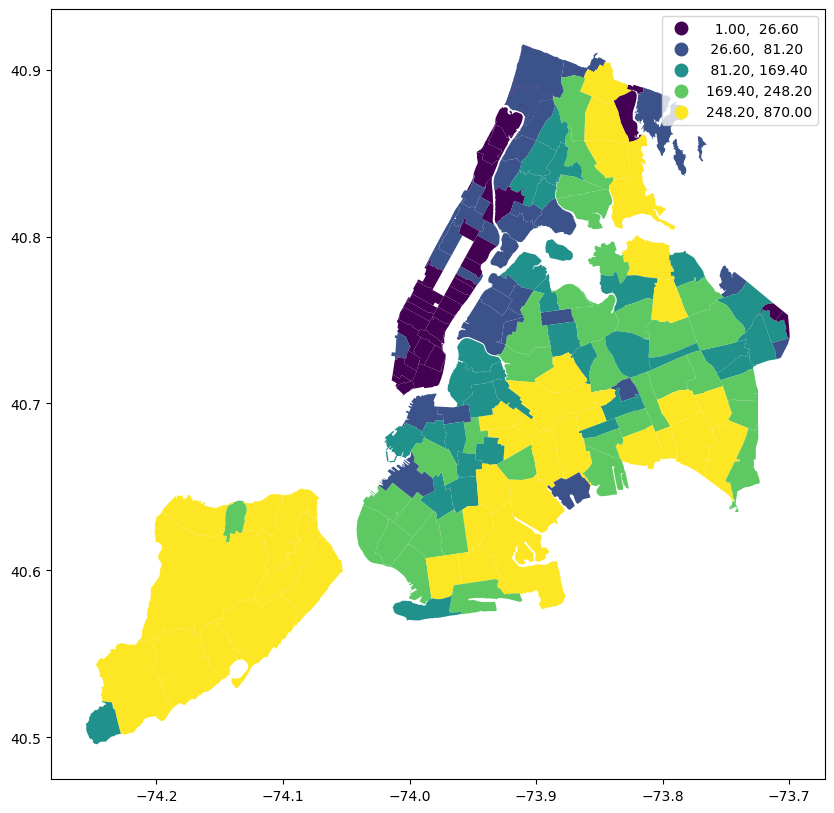

In [103]:
Result_SC.plot(figsize = (10,10), column='SALE COUNT 17' ,k=5,scheme = 'Quantiles', legend=True)

<AxesSubplot:>

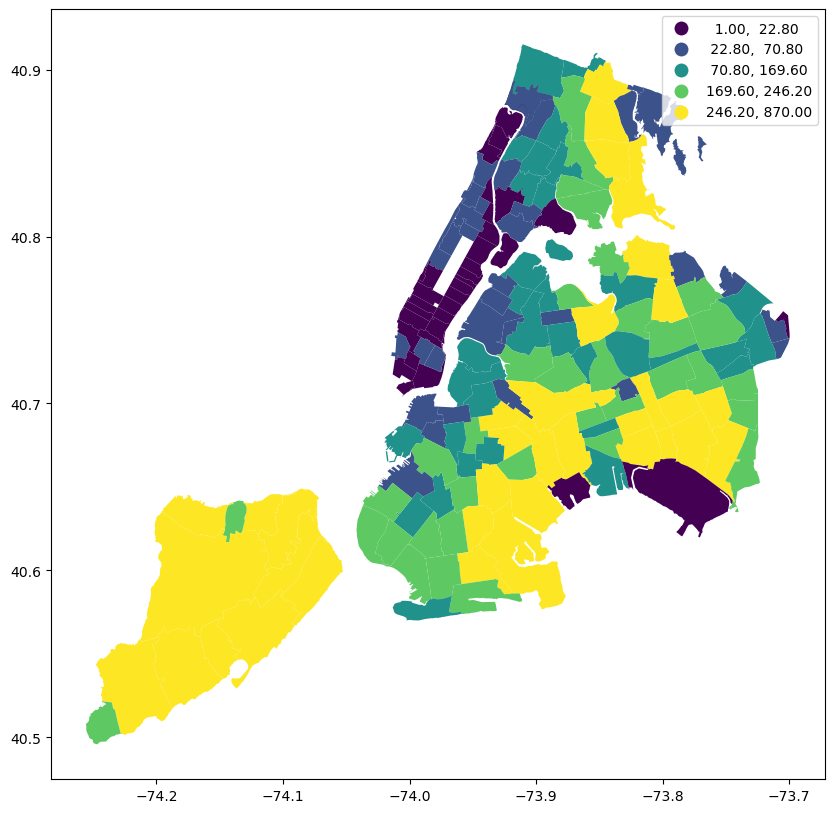

In [104]:
Result_SC.plot(figsize = (10,10), column='SALE COUNT 18' ,k=5,scheme = 'Quantiles', legend=True)

<AxesSubplot:>

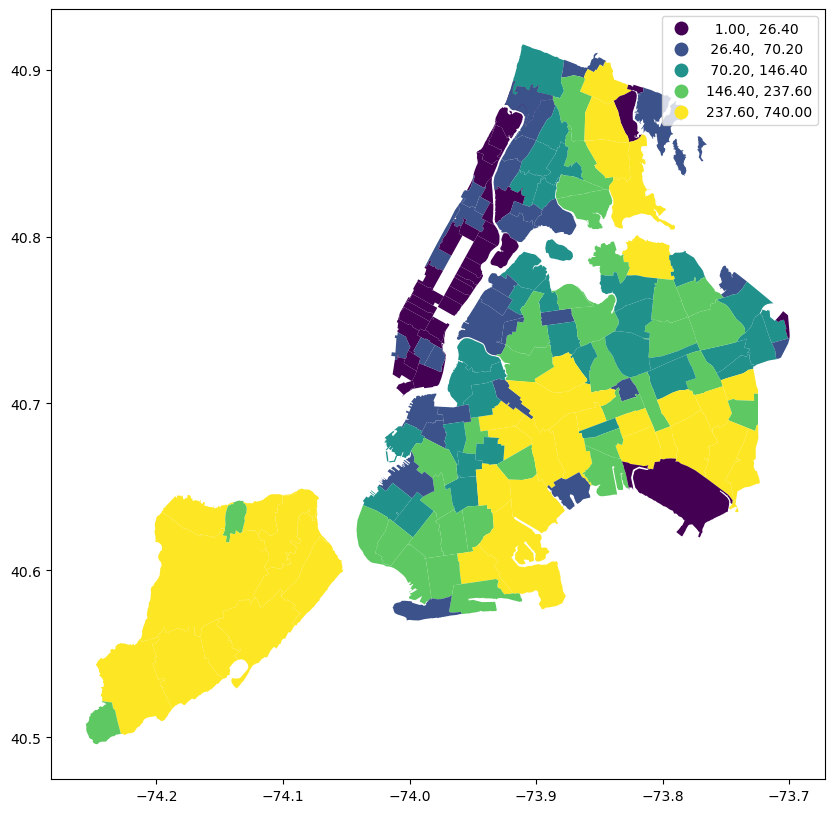

In [105]:
Result_SC.plot(figsize = (10,10), column='SALE COUNT 19' ,k=5,scheme = 'Quantiles', legend=True)

<AxesSubplot:>

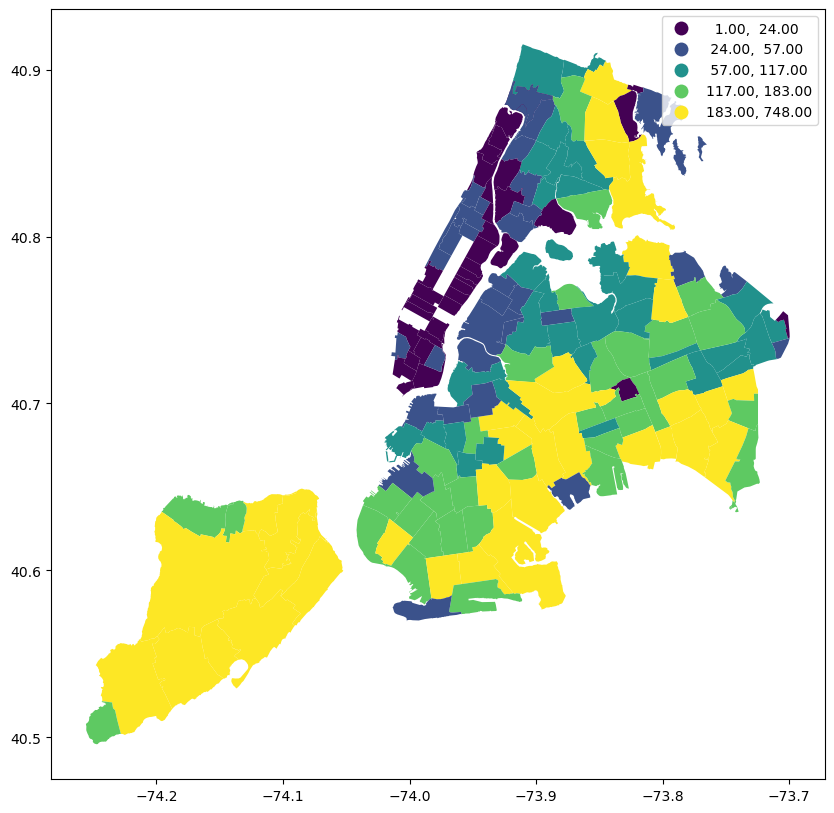

In [106]:
Result_SC.plot(figsize = (10,10), column='SALE COUNT 20' ,k=5,scheme = 'Quantiles', legend=True)

<AxesSubplot:>

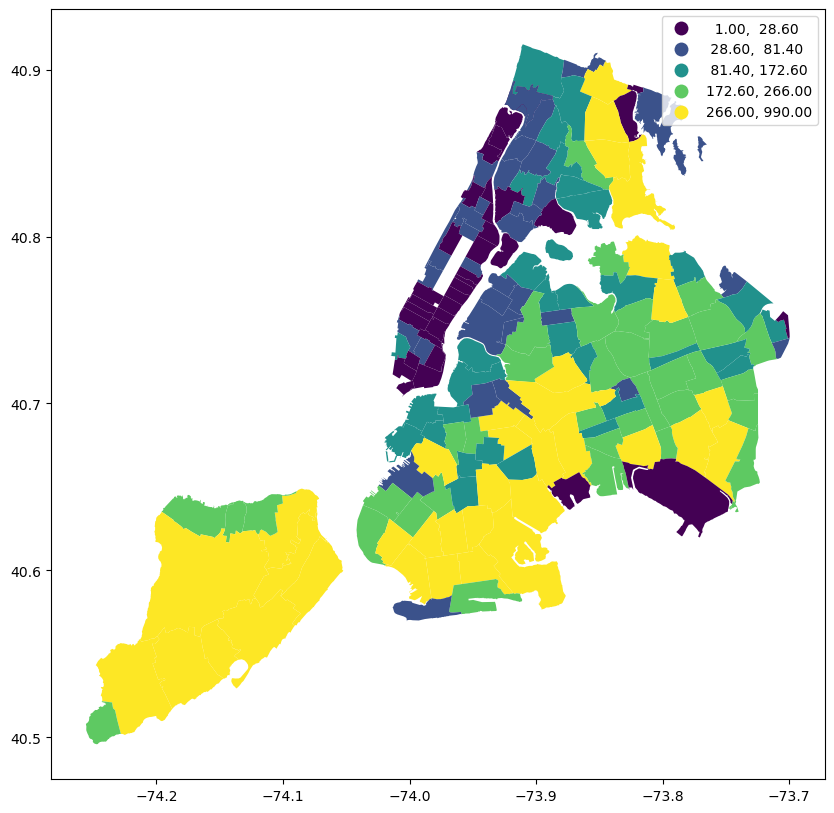

In [107]:
Result_SC.plot(figsize = (10,10), column='SALE COUNT 21' ,k=5,scheme = 'Quantiles', legend=True)

<AxesSubplot:>

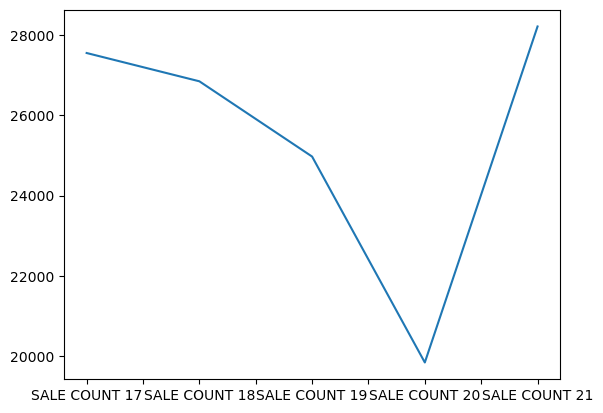

In [108]:
SC_sum = FinDataSC4.iloc[:,2:].sum()
SC_sum.plot()

In [117]:
SC_B = FinDataSC4.groupby(['BOROUGH']).sum()
SC_B.drop(columns='ZIP CODE',axis =1,inplace = True)
SC_B.reset_index(inplace = True)
SC_B['BOROUGH'].replace

,BOROUGH,SALE COUNT 17,SALE COUNT 18,SALE COUNT 19,SALE COUNT 20,SALE COUNT 21
0,1,621.0,642.0,656.0,496.0,773.0
1,2,3463.0,3585.0,3208.0,2429.0,3146.0
2,3,7774.0,7311.0,6972.0,5326.0,8108.0
3,4,10327.0,10045.0,9559.0,7341.0,10342.0
4,5,5372.0,5268.0,4578.0,4243.0,5850.0


<AxesSubplot:xlabel='BOROUGH'>

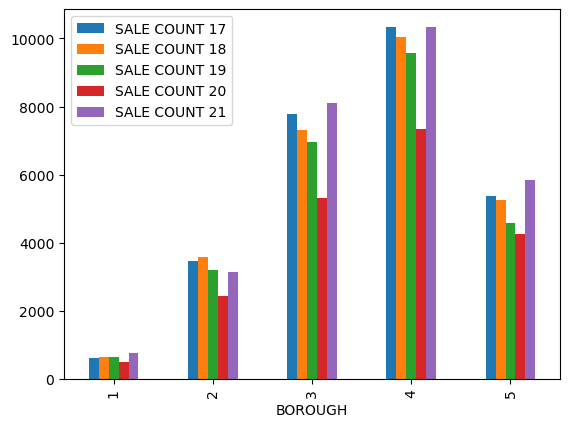

In [119]:
SC_B.plot(x="BOROUGH", y=['SALE COUNT 17','SALE COUNT 18', 'SALE COUNT 19','SALE COUNT 20','SALE COUNT 21'], kind="bar")


BUILDING CLASS NUMBERS/STATISTICS 


In [121]:
Data_2021_3['BUILDING CLASS CATEGORY'].value_counts()

01 ONE FAMILY DWELLINGS             14320
02 TWO FAMILY DWELLINGS              9562
03 THREE FAMILY DWELLINGS            2369
07 RENTALS - WALKUP APARTMENTS       1685
08 RENTALS - ELEVATOR APARTMENTS      281
37 RELIGIOUS FACILITIES                 1
30 WAREHOUSES                           1
Name: BUILDING CLASS CATEGORY, dtype: int64

In [135]:
Data5_Sale_sum = pd.DataFrame([Data3['SALE PRICE'].sum(),Data_2018_3['SALE PRICE'].sum(),Data_2019_3['SALE PRICE'].sum(),
                              Data_2020_3['SALE PRICE'].sum(),Data_2021_3['SALE PRICE'].sum()])
Data5_Sale_sum['Year'] = [2017,2018,2019,2020,2021]
Data5_Sale_sum=Data5_Sale_sum.iloc[:,[1,0]]


<AxesSubplot:xlabel='Year'>

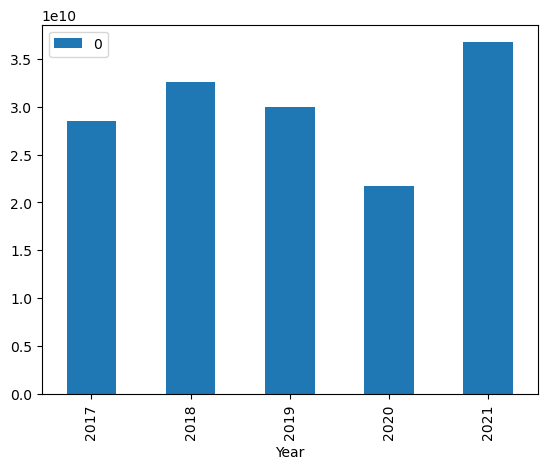

In [136]:
Data5_Sale_sum.plot(x="Year", kind="bar")

In [147]:
Data5_boro_2017 = Data3.groupby(['BOROUGH']).agg({'SALE PRICE':'sum'})
Data5_boro_2017.reset_index(inplace = True) 
Data5_boro_2017['SALE SUM 17'] = Data5_boro_2017['SALE PRICE']
Data5_boro_2017.drop(columns = 'SALE PRICE', axis = 1, inplace = True)
                                                 
Data5_boro_2018 = Data_2018_3.groupby(['BOROUGH']).agg({'SALE PRICE':'sum'})
Data5_boro_2018.reset_index(inplace = True) 
Data5_boro_2018['SALE SUM 18'] = Data5_boro_2018['SALE PRICE']
Data5_boro_2018.drop(columns = 'SALE PRICE', axis = 1, inplace = True)
                                                       
                                                 
Data5_boro_2019 = Data_2019_3.groupby(['BOROUGH']).agg({'SALE PRICE':'sum'})
Data5_boro_2019.reset_index(inplace = True) 
Data5_boro_2019['SALE SUM 19'] = Data5_boro_2019['SALE PRICE']
Data5_boro_2019.drop(columns = 'SALE PRICE', axis = 1, inplace = True)
                                                       
                                                 
Data5_boro_2020 = Data_2020_3.groupby(['BOROUGH']).agg({'SALE PRICE':'sum'})
Data5_boro_2020.reset_index(inplace = True) 
Data5_boro_2020['SALE SUM 20'] = Data5_boro_2020['SALE PRICE']
Data5_boro_2020.drop(columns = 'SALE PRICE', axis = 1, inplace = True)

                                                 
Data5_boro_2021 = Data_2021_3.groupby(['BOROUGH']).agg({'SALE PRICE':'sum'})
Data5_boro_2021.reset_index(inplace = True) 
Data5_boro_2021['SALE SUM 21'] = Data5_boro_2021['SALE PRICE']
Data5_boro_2021.drop(columns = 'SALE PRICE', axis = 1, inplace = True)
                                                       
Data_sum_5_1 = pd.merge(Data5_boro_2017,Data5_boro_2018,left_on = ['BOROUGH'],right_on=['BOROUGH'],how = 'outer')
Data_sum_5_2 = pd.merge(Data_sum_5_1,Data5_boro_2019, left_on =  ['BOROUGH'],right_on=['BOROUGH'],how = 'outer')
Data_sum_5_3 = pd.merge(Data_sum_5_2,Data5_boro_2020, left_on =  ['BOROUGH'],right_on=['BOROUGH'],how = 'outer')
Data_sum_5_4 = pd.merge(Data_sum_5_3,Data5_boro_2021, left_on = ['BOROUGH'],right_on=['BOROUGH'],how = 'outer')
Data_sum_5_4

,BOROUGH,SALE SUM 17,SALE SUM 18,SALE SUM 19,SALE SUM 20,SALE SUM 21
0,1,6064016339,7638363471,7181839762,3960858101,7393288220
1,2,2880638284,3189374462,2775529502,2349540942,3241594059
2,3,9086173377,10300253526,9241574225,7184784214,12967507960
3,4,7691882982,8526041845,8135525905,5669576417,9130813686
4,5,2770143338,2947074823,2602448808,2571497329,3980008127


<AxesSubplot:xlabel='BOROUGH'>

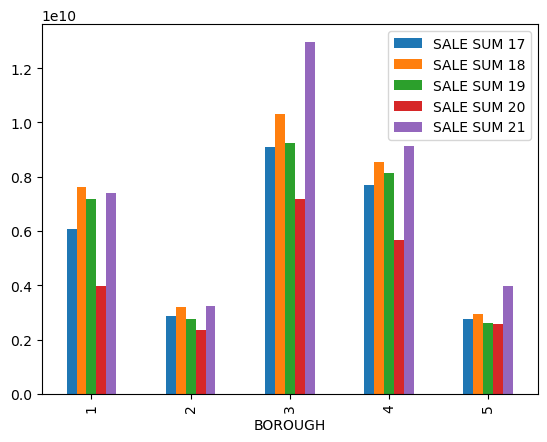

In [148]:
Data_sum_5_4.plot(x="BOROUGH", y=['SALE SUM 17','SALE SUM 18', 'SALE SUM 19','SALE SUM 20','SALE SUM 21'], kind="bar")

In [149]:
Data_21_boro=Data_2021_3.groupby(['BOROUGH','BUILDING CLASS CATEGORY']).agg({'SALE PRICE':'sum','BUILDING CLASS CATEGORY':'count'})
Data_21_boro

SALE PRICE  BUILDING CLASS CATEGORY
BOROUGH BUILDING CLASS CATEGORY                                              
1       01 ONE FAMILY DWELLINGS           1263749681                      128
        02 TWO FAMILY DWELLINGS            459029759                       88
        03 THREE FAMILY DWELLINGS          207273302                       50
        07 RENTALS - WALKUP APARTMENTS    3489195648                      393
        08 RENTALS - ELEVATOR APARTMENTS  1974039830                      114
2       01 ONE FAMILY DWELLINGS            676562694                     1088
        02 TWO FAMILY DWELLINGS            890323466                     1326
        03 THREE FAMILY DWELLINGS          351778230                      455
        07 RENTALS - WALKUP APARTMENTS     851326233                      227
        08 RENTALS - ELEVATOR APARTMENTS   465103436                       49
        30 WAREHOUSES                        6500000                        1
3       01 ONE FAMILY DWELLINGS           2990542615                     2599
        02 TWO FAMILY DWELLINGS           4398145050                     3505
        03 THREE FAMILY DWELLINGS         1645675879                     1168
        07 RENTALS - WALKUP APARTMENTS    2040196010                      744
        08 RENTALS - ELEVATOR APARTMENTS  1890448406                       91
        37 RELIGIOUS FACILITIES              2500000                        1
4       01 ONE FAMILY DWELLINGS           4743795918                     6259
        02 TWO FAMILY DWELLINGS           2729783635                     3116
        03 THREE FAMILY DWELLINGS          708645969                      651
        07 RENTALS - WALKUP APARTMENTS     524466116                      290
        08 RENTALS - ELEVATOR APARTMENTS   424122048                       26
5       01 ONE FAMILY DWELLINGS           2589681700                     4246
        02 TWO FAMILY DWELLINGS           1272028185                     1527
        03 THREE FAMILY DWELLINGS           29982004                       45
        07 RENTALS - WALKUP APARTMENTS      29616238                       31
        08 RENTALS - ELEVATOR APARTMENTS    58700000                        1

In [150]:
Data_20_boro=Data_2020_3.groupby(['BOROUGH','BUILDING CLASS CATEGORY']).agg({'SALE PRICE':'sum','BUILDING CLASS CATEGORY':'count'})
Data_20_boro

SALE PRICE  BUILDING CLASS CATEGORY
BOROUGH BUILDING CLASS CATEGORY                                               
1       01 ONE FAMILY DWELLINGS             648761400                       67
        02 TWO FAMILY DWELLINGS             266498335                       47
        03 THREE FAMILY DWELLINGS            73751864                       21
        07 RENTALS - WALKUP APARTMENTS     1249555107                      292
        08 RENTALS - ELEVATOR APARTMENTS   1722291395                       69
2       01 ONE FAMILY DWELLINGS             446110970                      827
        02 TWO FAMILY DWELLINGS             852340236                     1091
        03 THREE FAMILY DWELLINGS           213842235                      318
        07 RENTALS - WALKUP APARTMENTS      344811552                      153
        08 RENTALS - ELEVATOR APARTMENTS    492435949                       40
3       01 ONE FAMILY DWELLINGS            1641675696                     1663
        02 TWO FAMILY DWELLINGS            2592873548                     2418
        03 THREE FAMILY DWELLINGS          1049826370                      774
        07 RENTALS - WALKUP APARTMENTS     1036911483                      418
        08 RENTALS - ELEVATOR APARTMENTS    862877117                       52
        37 RELIGIOUS FACILITIES                620000                        1
4       01 ONE FAMILY DWELLINGS            3043536225                     4475
        02 TWO FAMILY DWELLINGS            1869397053                     2326
        03 THREE FAMILY DWELLINGS           373500727                      354
        07 RENTALS - WALKUP APARTMENTS      236387884                      149
        08 RENTALS - ELEVATOR APARTMENTS    146754528                       37
5       01 ONE FAMILY DWELLINGS            1782875168                     3141
        02 TWO FAMILY DWELLINGS             740912580                     1052
        03 THREE FAMILY DWELLINGS            17644881                       29
        07 RENTALS - WALKUP APARTMENTS       17484700                       19
        08 RENTALS - ELEVATOR APARTMENTS     11950000                        1
        32 HOSPITAL AND HEALTH FACILITIES      630000                        1

SALE PRICE SUM NUMBERS/STATISTICS